<a href="https://colab.research.google.com/github/bala1802/END_Assignments/blob/main/Session5_SimpleNeuralAccumulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
# x_in -> Input vector
# out_units -> number of output neurons
def NAC(x_in, out_units):
    in_features = x_in.shape[1]
    # define W_hat and M_hat
    W_hat = tf.get_variable(name = "W_hat", initializer=tf.initializers.random_uniform(minval=-2, maxval=2),
                            shape=[in_features, out_units],  trainable=True)
    M_hat = tf.get_variable(name = "M_hat", initializer=tf.initializers.random_uniform(minval=-2, maxval=2), 
                            shape=[in_features, out_units], trainable=True)
    print('########### W_hat is : ', W_hat)
    print('########### M_hat is : ', M_hat)
    # Get W
    W = tf.nn.tanh(W_hat) * tf.nn.sigmoid(M_hat)
    print('########### W is : ', W)
    y_out = tf.matmul(x_in, W)
    print('########### y_out is : ', y_out)
    return y_out, W

Test the Network by learning the adition

In [ ]:
# Generate a series of input number X1 and X2 for training
x1 = np.arange(0,10000, 5, dtype=np.float32)
x2 = np.arange(5,10005, 5, dtype=np.float32)

In [ ]:
y_train = x1 + x2
#y_train = x1 - x2

In [ ]:
x_train = np.column_stack((x1,x2))

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2000, 2)
(2000,)


In [ ]:
# Generate a series of input number X1 and X2 for testing
x1 = np.arange(1000,2000,8, dtype=np.float32)
x2 = np.arange(1000,1500,4, dtype= np.float32)

In [ ]:
x_test = np.column_stack((x1,x2))
y_test = x1 + x2
#y_test = x1 - x2

In [ ]:
print(x_test.shape)
print(y_test.shape)

(125, 2)
(125,)


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Define the placeholder to feed the value at run time
X = tf.placeholder(dtype=tf.float32, shape =[None , 2])    # Number of samples x Number of features (number of inputs to be added)
Y = tf.placeholder(dtype=tf.float32, shape=[None,])

In [ ]:
Y

<tf.Tensor 'Placeholder_1:0' shape=(?,) dtype=float32>

In [ ]:
y_pred, W = NAC(X, out_units=1)
print('y_pred.shape is : ', y_pred.shape)

########### W_hat is :  <tf.Variable 'W_hat:0' shape=(2, 1) dtype=float32_ref>
########### M_hat is :  <tf.Variable 'M_hat:0' shape=(2, 1) dtype=float32_ref>
########### W is :  Tensor("mul:0", shape=(2, 1), dtype=float32)
########### y_out is :  Tensor("MatMul:0", shape=(?, 1), dtype=float32)
y_pred.shape is :  (?, 1)


In [ ]:
y_pred = tf.squeeze(y_pred)
print('y_pred.shape after squeezing : ', y_pred.shape)

y_pred.shape after squeezing :  <unknown>


In [ ]:
# Mean Square Error (MSE)
loss = tf.reduce_mean( (y_pred - Y) **2)

In [ ]:
# training parameters
alpha = 0.05    # learning rate
epochs = 22000

In [ ]:
optimize = tf.train.AdamOptimizer(learning_rate=alpha).minimize(loss)

Pre training MSE:  13301843.0



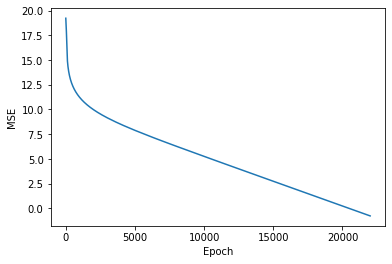


[[0.9999303]
 [0.999951 ]]

Post training MSE:  0.028090807
Actual sum:  [2000. 2012. 2024. 2036. 2048. 2060. 2072. 2084. 2096. 2108.]

Predicted sum:  [1999.8813 2011.8806 2023.8799 2035.8792 2047.8783 2059.8774 2071.877
 2083.876  2095.8755 2107.8745]


In [ ]:
with tf.Session() as sess:

    #init = tf.global_variables_initializer()
    cost_history = []

    sess.run(tf.global_variables_initializer())

    # pre training evaluate
    print("Pre training MSE: ", sess.run (loss, feed_dict={X: x_test, Y:y_test}))
    print()
    for i in range(epochs):
        _, cost = sess.run([optimize, loss ], feed_dict={X:x_train, Y: y_train})
        #print("epoch: {}, MSE: {}".format( i,cost) )
        cost_history.append(cost)

    # plot the MSE over each iteration
    plt.plot(np.arange(epochs),np.log(cost_history))  # Plot MSE on log scale
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.show()

    print()
    print(W.eval())
    print()
    # post training loss
    print("Post training MSE: ", sess.run(loss, feed_dict={X: x_test, Y: y_test}))

    print("Actual sum: ", y_test[0:10])
    print()
    print("Predicted sum: ", sess.run(y_pred[0:10], feed_dict={X: x_test, Y: y_test}))

In [ ]:
print(x_test[0:10])

[[1000. 1000.]
 [1008. 1004.]
 [1016. 1008.]
 [1024. 1012.]
 [1032. 1016.]
 [1040. 1020.]
 [1048. 1024.]
 [1056. 1028.]
 [1064. 1032.]
 [1072. 1036.]]
